# Лабораторная работа №5.  Цифровой спектральный анализ.

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
def DTFT(x, M):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке 
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        колличество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот, 
        соотвествующих вычисленным значениям
        спектральной функции  
    complex
        значения спектральной функции      
    """
    return (np.fft.fftshift(np.fft.fftfreq(M, d=1)), np.fft.fftshift(np.fft.fft(x, M)))

In [ ]:
%matplotlib inline

In [ ]:
%matplotlib notebook

# Модуль 1. Окна в спектральном анализе методом ДПФ, алгоритмы вычисления ДПФ.

## Задача 1.1. Окна в спектральном анализе

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное |
| $w_2[k]$ | Бартлетта | Хэмминга | Хэмминга | Бартлетта | Бартлетта | Хэмминга |
| $w_3[k]$ | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop |
| $n_0$ | $20$ | $16$ | $22$  | $24$  | $25$  | $18$  |



Постройте графики для трех окон длины $N=64$ из таблицы во временной  области ($w_i[k]$, $i=1, 2,3$) и в частотной  области (ДВПФ в линейном масштабе и в дБ). 
Для каждого из окон графически определите следующие параметры.
* Ширину $\Delta \nu$ главного лепестка на нулевом уровне.
* Ширину $\Delta \nu$  главного лепестка на уровне -3дБ от максимума модуля ДВПФ.
* Ширину $\Delta \nu$  главного лепестка на уровне -6дБ от максимума модуля ДВПФ.
* Максимальный уровень боковых лепестков в дБ относительно главного. 

Произведите спектральный анализ с помощью ДПФ размерности $M=2048$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{64} k\right)+ \cos\left(2\pi \dfrac{n_0+2}{64} k\right)$$
 со взвешиванием этими оконными функциями. Ответьте на следующие вопросы.
 
1) Для каких оконных функций гармонические компоненты оказались различимы и почему?

2) Как влияет максимальный уровень боковых лепестков на результат спектрального анализа? 


In [5]:
N = 64
k = np.arange(N)
n_0 = 25
windows = ["boxcar", "bartlett", "flattop"]

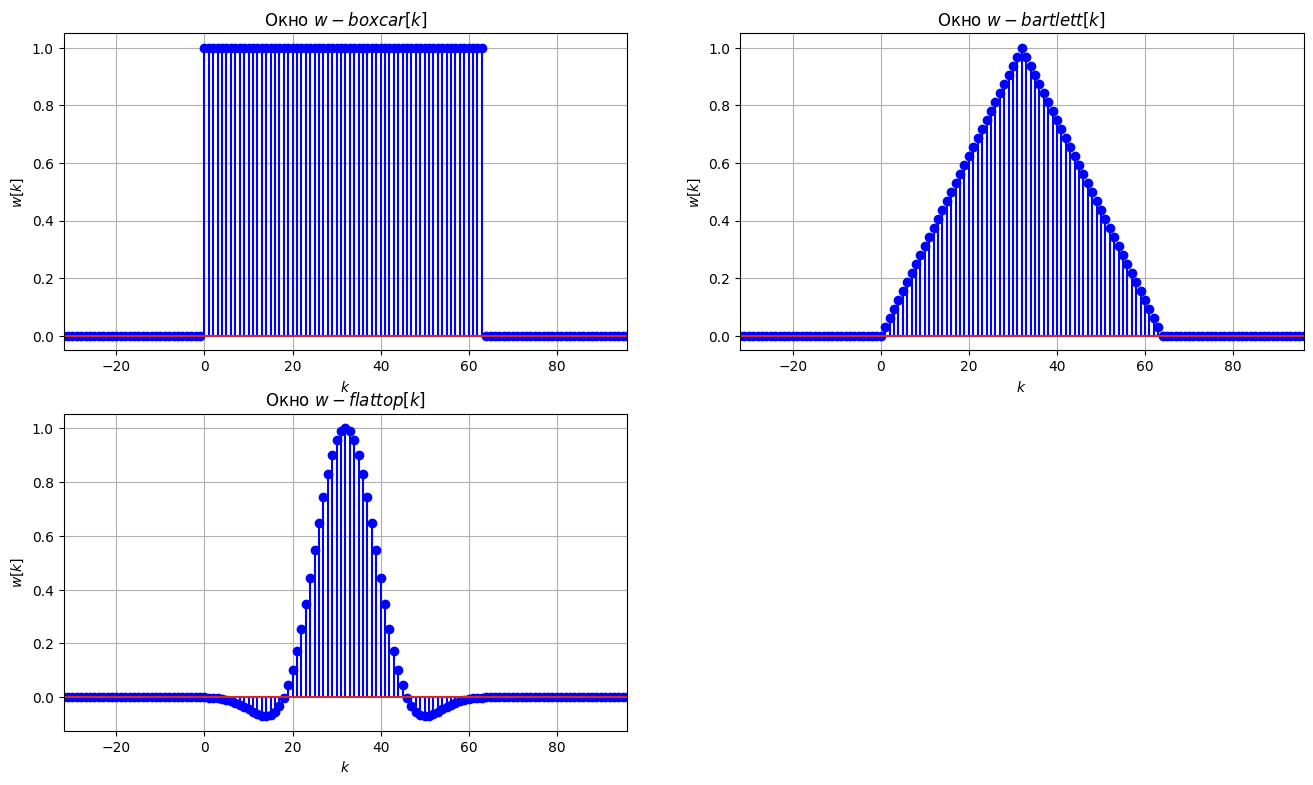

In [31]:
figure = plt.figure(figsize=[16, 14])
for index, window_name in enumerate(windows):
    window = signal.get_window(window_name, N)
    plt.subplot(3, 2, index + 1)
    plt.title(f"Окно $w-{window_name}[k]$")
    plt.stem(np.hstack([k-N, k, k+N]), np.hstack([np.zeros_like(window), window, np.zeros_like(window)]), linefmt='b', markerfmt='bo')
    plt.grid()
    plt.xlim([-N / 2, 3 / 2 * N])
    plt.xlabel("$k$")
    plt.ylabel("$w[k]$")

In [35]:
def DTFT_abs(x, M):
    return (-0.5+(np.arange(M)/M), abs(np.fft.fftshift(np.fft.fft(x, M))))

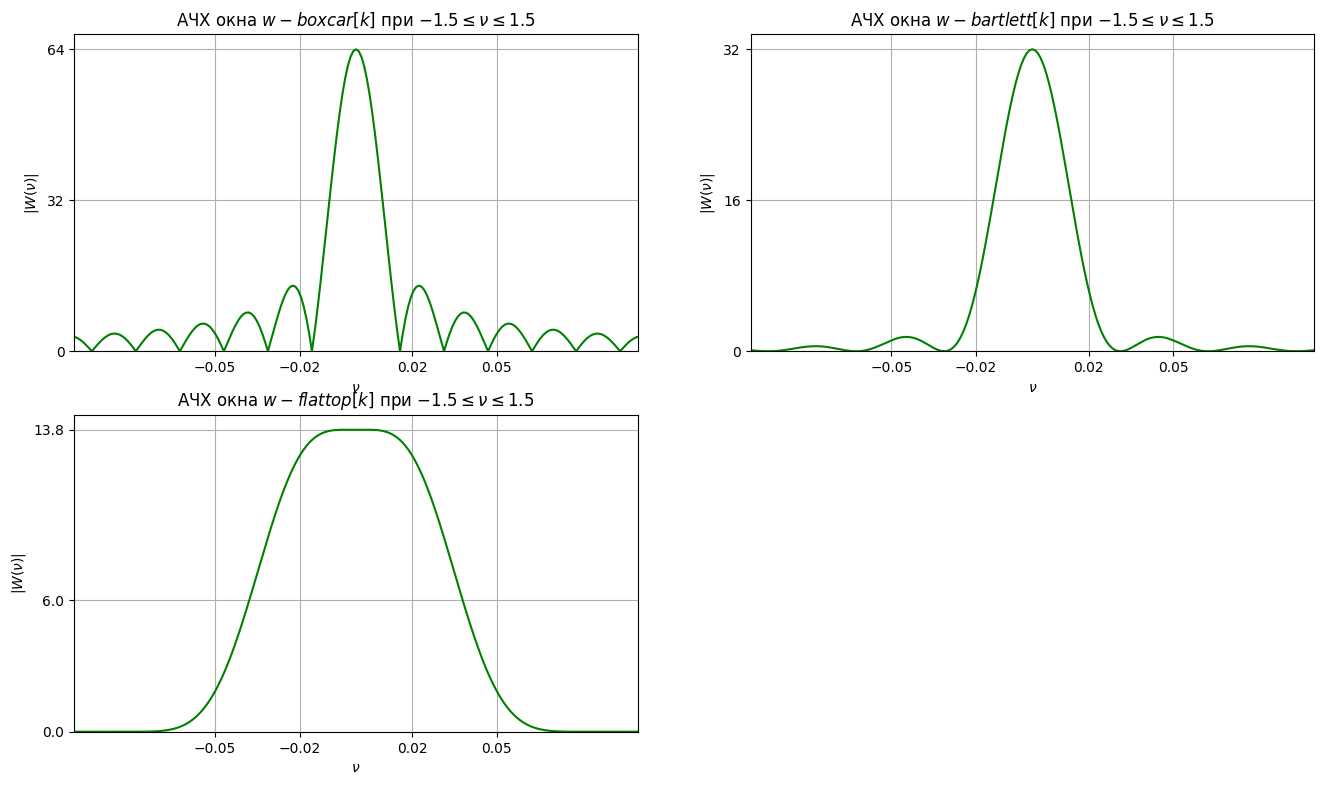

In [44]:
figure = plt.figure(figsize=[16, 14])
M = 1024
for index, window_name in enumerate(windows):
    window = signal.get_window(window_name, N)
    plt.subplot(3, 2, index + 1)
    f1, W1 = DTFT_abs(window, M)
    plt.plot(np.hstack([f1-1, f1, f1+1]), np.hstack([W1, W1, W1]), 'g'); 
    plt.axis(xmin=-1.5, xmax=1.5, ymin=0)
    plt.xticks(np.arange(-0.5, 0.6, 0.25))
    plt.title(f'АЧХ окна $w-{window_name}[k]$ при $-1.5 \\leq \\nu \\leq 1.5$') #, N=%i' %N)
    plt.xlabel(u'$\\nu$')
    plt.xlim([-0.1, 0.1])
    plt.xticks([-0.05, 0.05, -0.02, 0.02])
    plt.ylabel(u'$|W(\\nu)|$')
    plt.yticks([0, max(W1)//2, max(W1)])
    plt.grid()

/tmp/ipykernel_13654/3573905887.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f1, 20*np.log10(abs(W1)/max(abs(W1))))


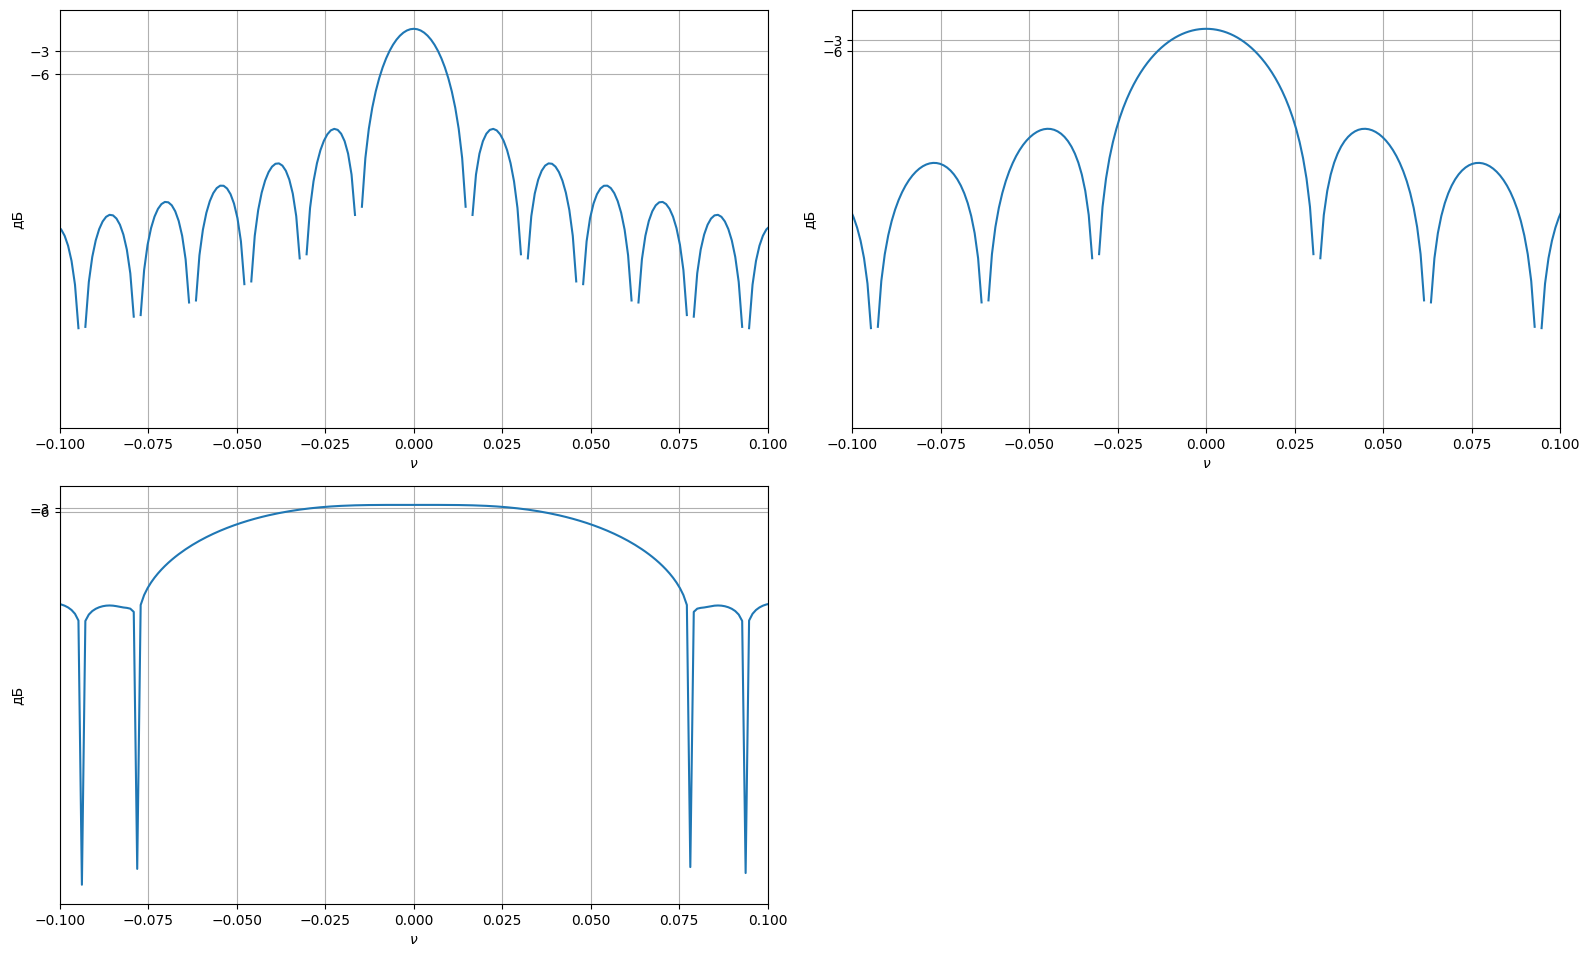

In [58]:
figure = plt.figure(figsize=[16, 14])
M = 1024
for index, window_name in enumerate(windows):
    window = signal.get_window(window_name, N)
    plt.subplot(3, 2, index + 1)
    f1, W1 = DTFT_abs(window, M)
    plt.plot(f1, 20*np.log10(abs(W1)/max(abs(W1))))
    plt.xlabel('$\\nu$')
    plt.ylabel('дБ')
    plt.xlim([-0.1, 0.1])
    plt.yticks([-3, -6])
    plt.grid()
    plt.tight_layout()

Прямоугольное окно: по нулю: 0.035, -3дб: 0.016б -6дб: 0.022

Окно Бартлетта: по нулю: 0.08, -3дб: 0.023, -6 дб: 0.3

Окно плоское: по нулю: 0.14, -3дб: 0.6 -6дб: 0.6


## Задача 1.2. Алгоритмы вычисления ДПФ.
| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | major-scale-piano.wav | xylophone1.wav | xylophone9.wav | glockenspiel1.wav | flute.wav | glockenspiel2.wav |

1) Используя данные из файла, сформировать последовательность $x[k]$ длиной 2048 отсчетов (например, по отсчетам сигнала из середины записи). 

2) Вычислить 2048-точечное ДПФ для $x[k]$, используя 
* а) матричную форму ДПФ, 
* б) быстрое преобразование Фурье. 

Сравнить результаты. 

3) Написать программу вычисления одного отсчета ДПФ по алгоритму Герцеля. Сравнить результаты вычислений с БПФ для любых трех значений $n$. 

---

**Алгоритм Герцеля**

1. Для $m=0,\,1,\, \dots,\, N-1$ определяем 

$${{V}_{n}}[m]=x[m]+2\cos (2\pi n/N){{V}_{n}}[m-1]-{{V}_{n}}[m-2],\quad 0\le m\le N-1,$$

2. Вычисляем $X[n]$ (при $m=N-1$):

$$X[n]={{\left. {{y}_{n}}[m] \right|}_{m=N-1}}={{\left. \left( W_{N}^{-n}{{V}_{n}}[m]-{{V}_{n}}[m-1] \right) \right|}_{m=N-1}}.$$
$$V_n[-1]=V_n [-2] = 0$$

---



# Модуль 2. Кратковременное дискретное преобразование Фурье

## Задача 2.1. Кратковременное ДПФ (STFT)

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | major-scale-piano.wav | xylophone1.wav | xylophone9.wav | glockenspiel1.wav | flute.wav | glockenspiel2.wav |


Вычислите с помощью Python кратковременное дискретное преобразование Фурье (STFT) для отсчетов сигнала, содержащихся в аудиофайле из таблицы. Изобразите спектрограмму сигнала. Длину окна $M$, тип оконной функции, число точек в перекрытии $L$, масштабы осей и размерность ДПФ $N_\text{FFT}$ самостоятельно подберите так, чтобы можно было выделить гармонические компоненты в сигнале. Ответьте на следующие вопросы.

1) Какие выводы можно сделать о составе данного сигнала по спектрограмме?  

2) Чему равны длина окна и размер перекрытия в секундах? Как это соотносится с графиком?

3) Какое разрешение по времени и какое по частоте для данной спектрограммы? 

4) Какие изменения можно наблюдать в спектрограмме, если изменяется:

* а) тип оконной функции,
* б) длина окна $M$,
* в) размерность ДПФ $N_\text{FFT}$ за счет дополнения нулевыми отсчетами?










#  Модуль 3. Периодограммные методы оценки СПМ

## Задача 3.1. Интерполяция периодограммы дополнением нулевых отсчетов (Zero Padding)

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_2_1.npy | variant_2_ex_2_1.npy | variant_3_ex_2_1.npy | variant_4_ex_2_1.npy | variant_5_ex_2_1.npy| variant_6_ex_2_1.npy|

По представленным в файле отсчетам сигнала построить периодограмму, для которой размерность ДПФ совпадает с длительность сигнала. Сравнить ее с периодограммой, для которой размерность ДПФ в 8 раз больше. Частота дискретизации  $f_s=16$ кГц. Ответить на вопросы.

1) Какое разрешение по частоте, обусловленное сеткой частот ДПФ, у периодограммы в первом и во втором случае?

2) Как частота наблюдаемой гармонической компоненты соотносится с сеткой частот ДПФ в первом и во втором случае? 

3) Почему расчет периодограммы достаточно провести для интервала частот $f \in [0; 0,5f_s]$?

Ниже приведен пример кода, позволяющий выгрузить отчеты сигнала $x[k]$  (`x`). 

In [ ]:
x = np.load('variant_N_ex_2_1.npy')

## Задача 3.2. Выделение синусоиды на фоне шума
Постройте периодограмму для оценки СПМ процесса, по выборкам, которые могут быть описаны формулой

$$x[k]=a_1 \sin(2\pi k f_0 /f_s) + \varepsilon[k], \;\; k=0, 1, \dots, N-1,$$

где $N=64$, $\varepsilon[k]$ — дискретный белый гауссовский шум c нулевым средним и с дисперсией $\sigma^2=400$ (`scale=20`), $a_1=5$, частота дискретизации  $f_s=16$ кГц, $f_0=2$ кГц.

Определите, возможно ли выделение гармонической компоненты в периодограмме на фоне шума (при $N=64$)? Вычислите такую длину записи (реализации), чтобы математическое ожидание оценки СПМ для чистого сигнала на частоте $f_0$ превосходило в 40 раз  математическое ожидание оценки СПМ шума. Постройте периодограмму для такого случая.

#  Модуль 4. Методы оценки СПМ (продолжение)

## Задача 4.1. Методы Уэлча и  Блэкмана-Тьюки

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_1.npy | variant_2_ex_3_1.npy | variant_3_ex_3_1.npy | variant_4_ex_3_1.npy | variant_5_ex_3_1.npy| variant_6_ex_3_1.npy|

По отсчетам из файла (см. таблицу) постройте оценку СПМ по методам:
* периодограмм,
* Блэкмана-Тьюки,
* модифицированных периодограмм Уэлча.

Сделайте выводы о составе процесса. Выбор параметров оценок СПМ осуществите самостоятельно. Частота дискретизации $f_s=16$ кГц. Сравните результаты. 

Оцените частоту $f_1$, если известно, что случайный процесс, СПМ которого оценивается по этим выборкам, имеет вид 
$$x(t)=a_1 \sin(2\pi f_1 t) + \varepsilon(t),$$
где $\varepsilon(t)$ — белый шум с нулевым математическим ожиданием.


In [ ]:
x = np.load('variant_N_ex_3_1.npy')

## Задача 4.2*. Метод Блэкмана-Тьюки для несмещенной оценки АКФ

Модифицируйте функции `auto_correlation` и `blackman_tukey_estimator` так, чтобы их можно было использовать и с несмещенной оценкой АКФ (со значениями соответствующих параметров `unbiased`). Постойте оценку СПМ по методу Блэкмана-Тьюки с несмещенной оценкой АКФ для данных из задачи 4.1. Выбор окна и размерность ДПФ осуществить самостоятельно. Сравните результат с задачей 4.1. 

In [ ]:
def auto_correlation(x, N1, mode='biased'):
    Rx = signal.correlate(x, x) / len(x)
    lag = np.arange(-(len(x)-1), len(x))
    return Rx[np.logical_and(lag<=N1-1, lag>=0)]

def blackman_tukey_estimator(x, window='bartlett', Nfft=None, auto_correlation_mode='biased', fs=1):
    N = len(x)
    N1 = int(np.ceil(N/10))
    if Nfft is None:
        Nfft=max(2**12, N)
    window = signal.get_window(window, 2*N1-1, fftbins=False)
    Rx = auto_correlation(x, N1, mode=auto_correlation_mode) * window[N1-1:2*N1:1]
    return fs*np.arange(Nfft)/Nfft, (2*np.fft.fft(Rx, Nfft).real - Rx[0])/fs

## Задача 4.3*. Оценка кросс-спектральной плотности мощности 

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_3.npy | variant_2_ex_3_3.npy | variant_3_ex_3_3.npy | variant_4_ex_3_3.npy | variant_5_ex_3_3.npy| variant_6_ex_3_3.npy|

Для данных из файла (см. таблицу) об отсчетах сигналов из ансамбля реализаций случайных процессов $x(t)$ и $y(t)$ построить с помощью метода Уэлча
* оценку СПМ процесса $x(t)$,
* оценку СПМ процесса $y(t)$,
* модуль оценки взаимной СПМ процессов  $x(t)$ и $y(t)$.

Параметры оценок определить самостоятельно. Сделать выводы. 

In [ ]:
x, y = np.load('variant_N_ex_3_3.npy')

## Задача 4.4. Периодограмма Ломба-Скаргла

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_4.npy | variant_2_ex_3_4.npy | variant_3_ex_3_4.npy | variant_4_ex_3_4.npy | variant_5_ex_3_4.npy| variant_6_ex_3_4.npy|

Постройте периодограмму Ломба-Скаргла для данных, представленных в файле, который соответствует номеру Вашего варианта.
Известно, что исходный сигнал до взятия отсчетов с неравномерным шагом имеел форму
$$x(t)=a_1 \sin(2\pi f_1 t) + a_2 \sin(2\pi f_2 t)+  \varepsilon(t),$$
где $\varepsilon(t)$ — реализация белого шума с нулевым математическим ожиданием и дисперсией $\sigma^2>0$, причем частоты $ f_1$, $ f_2 $ представлены целым числом килогерц и не превосходят 8 кГц. Оцените частоты $ f_1$ и $ f_2 $, используя периодограмму Ломба-Скаргла.

Ниже приведен пример кода, позволяющий выгрузить отчеты сигнала $x(t_i)$  (`x`) в моменты времени $t_i$ (`t`). 

In [ ]:
x, t = np.load('variant_N_ex_3_4.npy')